# Textiles Stocks Analysis

## KPRMILL 

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import yfinance as yf 

In [84]:
kpr = yf.download('KPRMILL.NS', start="2019-01-01", end="2023-12-30")
kpr.head()  

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,112.080002,112.790001,111.470001,112.050003,109.892426,26810
2019-01-02,112.190002,112.190002,110.709999,111.070000,108.931290,31745
2019-01-03,111.110001,112.949997,111.000000,111.300003,109.156876,59550
2019-01-04,111.669998,111.820000,108.800003,109.260002,107.156151,68120
2019-01-07,110.580002,110.580002,107.199997,107.720001,105.645798,74415


In [85]:
kpr.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [86]:
kpr.describe() 

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,367.763263,374.733418,360.777408,367.172647,364.900258,3.000284e+05
std,243.871908,248.129777,239.374447,243.442527,243.187822,3.613974e+05
min,66.599998,68.820000,62.470001,65.650002,64.837700,0.000000e+00
25%,122.105000,124.609997,120.805000,122.125000,120.097065,7.839250e+04
50%,323.600006,334.000000,315.950012,323.649994,321.325897,1.858250e+05
75%,585.000000,595.774994,576.375000,583.899994,580.649658,3.885605e+05
max,893.000000,928.150024,865.049988,887.950012,887.950012,3.350450e+06


In [87]:
kpr.rename(columns={"Adj Close": "price_t"}, inplace=True)
kpr.head() 

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,112.080002,112.790001,111.470001,112.050003,109.892426,26810
2019-01-02,112.190002,112.190002,110.709999,111.070000,108.931290,31745
2019-01-03,111.110001,112.949997,111.000000,111.300003,109.156876,59550
2019-01-04,111.669998,111.820000,108.800003,109.260002,107.156151,68120
2019-01-07,110.580002,110.580002,107.199997,107.720001,105.645798,74415


#### Calculate daily returns.

#### The stock return calculation considers both the appreciation of the stock’s price and any dividends that were paid out during the holding period.

In [88]:
kpr['daily_returns']=kpr["price_t"].pct_change()
kpr    

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,112.080002,112.790001,111.470001,112.050003,109.892426,26810,NaN
2019-01-02,112.190002,112.190002,110.709999,111.070000,108.931290,31745,-0.008746
2019-01-03,111.110001,112.949997,111.000000,111.300003,109.156876,59550,0.002071
2019-01-04,111.669998,111.820000,108.800003,109.260002,107.156151,68120,-0.018329
2019-01-07,110.580002,110.580002,107.199997,107.720001,105.645798,74415,-0.014095
...,...,...,...,...,...,...,...
2023-12-22,842.650024,848.900024,817.849976,833.250000,833.250000,203391,-0.005075
2023-12-26,833.250000,838.000000,820.000000,824.150024,824.150024,102444,-0.010921
2023-12-27,823.000000,829.799988,816.250000,820.250000,820.250000,139243,-0.004732


#### Visualize the trend of stock price.

<Axes: xlabel='Date'>

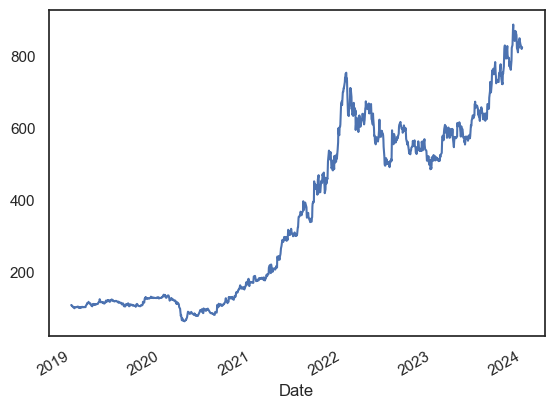

In [89]:
kpr['price_t'].plot()     

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

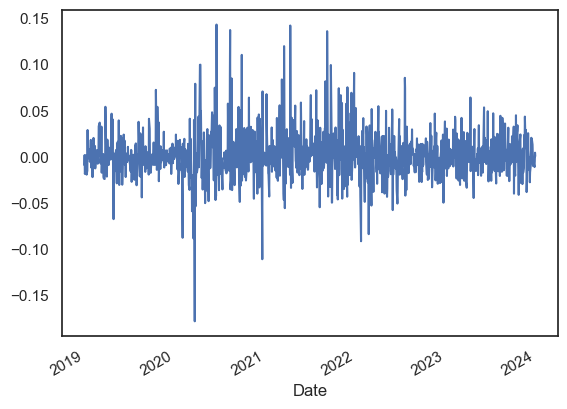

In [90]:
kpr['daily_returns'].plot() 

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of KPRMILL is in the downtrend in early 2020 and later increased accordingly the stock returns behaves same. This means the stock returns are very much predictable.

## Moving Average (30 day)

In [91]:
kpr['mov_avg']= kpr['price_t'].rolling(30).mean() 

<Axes: xlabel='Date'>

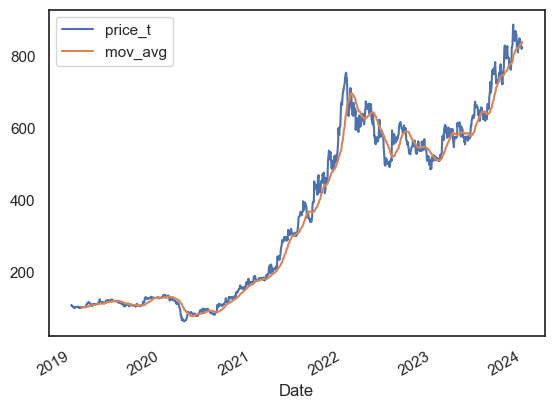

In [92]:
kpr[[ 'price_t' , 'mov_avg']].plot() 

## Volatility Measures (30 Day)

In [93]:
kpr['Log_Ret'] = np.log(kpr['price_t'] / kpr ['price_t'].shift(1))

 # compute volatility using the pandas rolling standard deviation function 

kpr ['volatility'] = kpr ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

<Axes: xlabel='Date'>

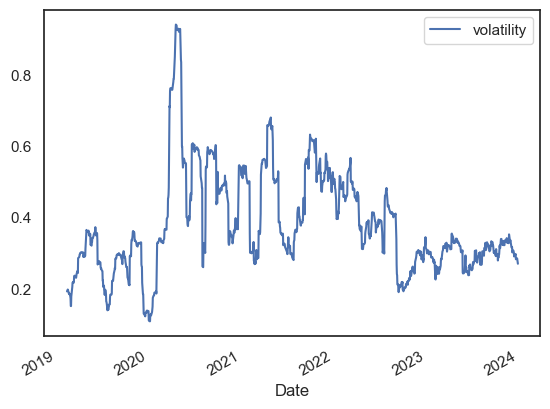

In [94]:
kpr [['volatility']] .plot() 

In [95]:
#### RSI (30-day)

change = kpr["price_t"].diff()
change.dropna(inplace=True)


In [96]:
# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

## Identify periods of high and low volatility.

[*********************100%%**********************]  1 of 1 completed


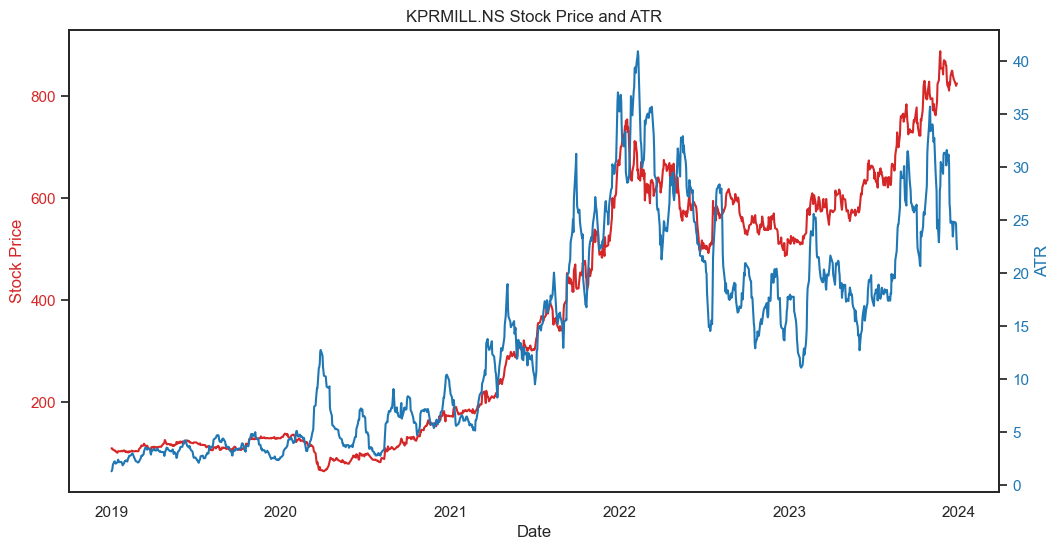

High ATR Periods:
DatetimeIndex(['2021-09-16', '2021-09-17', '2021-09-20', '2021-09-21',
               '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-27',
               '2021-09-28', '2021-09-29',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)

Low ATR Periods:
DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2020-07-30', '2020-07-31', '2020-08-03', '2020-08-04',
               '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-10',
               '2020-08-11', '2020-08-12'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)


In [97]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate Average True Range (ATR)
def calculate_atr(data, window_size):
    high_low_range = data['High'] - data['Low']
    high_close_range = abs(data['High'] - data['Close'].shift())
    low_close_range = abs(data['Low'] - data['Close'].shift())
    true_range = pd.concat([high_low_range, high_close_range, low_close_range], axis=1).max(axis=1)
    atr = true_range.rolling(window=window_size, min_periods=1).mean()
    return atr

# Define the stock ticker or index
ticker = 'KPRMILL.NS'  # Example: 

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Set the window size for calculating ATR (adjust as needed)
window_size = 14

# Calculate ATR
atr = calculate_atr(stock_data, window_size)

# Plotting the stock prices and ATR
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(stock_data.index, stock_data['Adj Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('ATR', color=color)
ax2.plot(atr.index, atr, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f'{ticker} Stock Price and ATR')
plt.show()

# Identify periods of high and low ATR
high_atr_periods = atr[atr > atr.quantile(0.75)].index
low_atr_periods = atr[atr < atr.quantile(0.25)].index

print("High ATR Periods:")
print(high_atr_periods)

print("\nLow ATR Periods:")
print(low_atr_periods)


## Examine the impact of earnings announcements on stock prices. 

[*********************100%%**********************]  1 of 1 completed


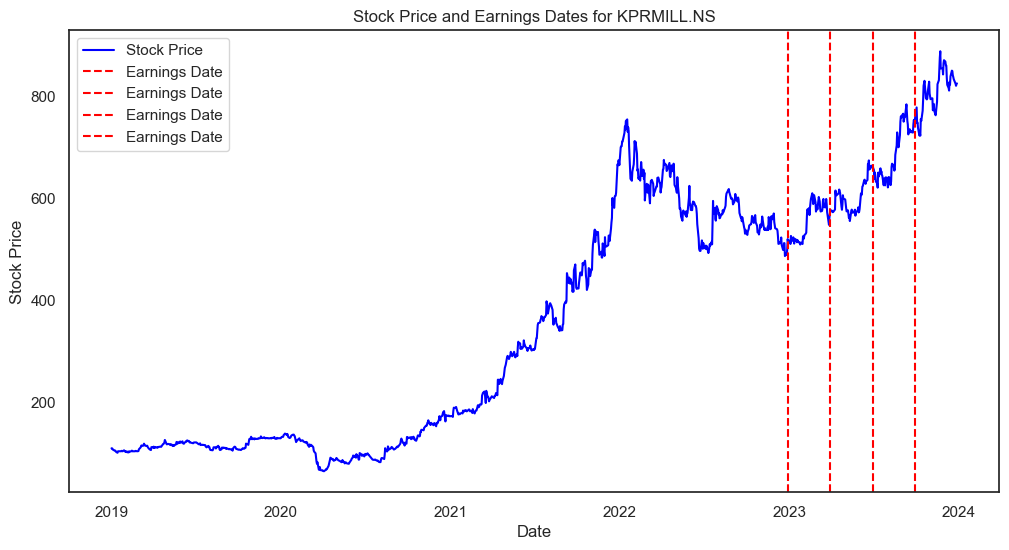

In [98]:

# Function to manually specify earnings dates
def get_manual_earnings_dates():
    # Manually input earnings dates (replace with actual dates)
    earnings_dates = ['2022-12-30', '2023-03-31', '2023-06-30', '2023-09-30']  # Quaterly bases 

    return pd.to_datetime(earnings_dates)

# Function to fetch stock price data and plot earnings impact
def plot_earnings_impact(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Manually specify earnings dates
    earnings_dates = get_manual_earnings_dates()

    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Adj Close'], label='Stock Price', color='blue')

    # Plot vertical lines at earnings dates
    for date in earnings_dates:
        plt.axvline(x=date, color='red', linestyle='--', label='Earnings Date')

    plt.title(f'Stock Price and Earnings Dates for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Set the stock ticker and date range
ticker = 'KPRMILL.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Plot stock prices around manually specified earnings dates
plot_earnings_impact(ticker, start_date, end_date)


#  LAXMIMACH 

#### Loading Desired Data from Yahoo Finance.

In [99]:
laxmi = yf.download('LAXMIMACH.NS', start="2019-01-01", end="2023-12-30")
laxmi.head()   

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,5740.600098,5804.399902,5710.000000,5761.149902,5596.933594,2173
2019-01-02,5820.000000,5820.000000,5710.049805,5714.899902,5552.002930,760
2019-01-03,5720.450195,5744.950195,5680.000000,5691.600098,5529.366699,1579
2019-01-04,5738.000000,5738.000000,5654.700195,5708.399902,5545.687500,2543
2019-01-07,5740.000000,5740.000000,5658.100098,5710.700195,5547.922363,1057


In [100]:
laxmi.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1234 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1234 non-null   float64
 1   High       1234 non-null   float64
 2   Low        1234 non-null   float64
 3   Close      1234 non-null   float64
 4   Adj Close  1234 non-null   float64
 5   Volume     1234 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [101]:
laxmi.describe() 

,Open,High,Low,Close,Adj Close,Volume
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,7737.509727,7861.420879,7617.861620,7724.667422,7630.621189,8197.247164
std,3723.491387,3766.989738,3677.894296,3720.336637,3726.839248,10160.528233
min,2035.000000,2245.000000,2000.000000,2129.199951,2083.723145,566.000000
25%,4043.212463,4085.962524,4000.000000,4031.750000,3958.579590,2953.750000
50%,7213.500000,7488.475098,6976.100098,7235.299805,7106.491211,5183.500000
75%,10928.150146,11143.700195,10798.750000,10916.700195,10800.718750,9620.500000
max,15450.000000,15499.900391,15025.000000,15330.650391,15330.650391,132203.000000


In [102]:
laxmi.rename(columns={"Adj Close": "price_t"}, inplace=True)
laxmi.head()


,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,5740.600098,5804.399902,5710.000000,5761.149902,5596.933594,2173
2019-01-02,5820.000000,5820.000000,5710.049805,5714.899902,5552.002930,760
2019-01-03,5720.450195,5744.950195,5680.000000,5691.600098,5529.366699,1579
2019-01-04,5738.000000,5738.000000,5654.700195,5708.399902,5545.687500,2543
2019-01-07,5740.000000,5740.000000,5658.100098,5710.700195,5547.922363,1057


### Calculate daily returns.

In [103]:
laxmi['daily_returns']=kpr["price_t"].pct_change()
laxmi

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,5740.600098,5804.399902,5710.000000,5761.149902,5596.933594,2173,NaN
2019-01-02,5820.000000,5820.000000,5710.049805,5714.899902,5552.002930,760,-0.008746
2019-01-03,5720.450195,5744.950195,5680.000000,5691.600098,5529.366699,1579,0.002071
2019-01-04,5738.000000,5738.000000,5654.700195,5708.399902,5545.687500,2543,-0.018329
2019-01-07,5740.000000,5740.000000,5658.100098,5710.700195,5547.922363,1057,-0.014095
...,...,...,...,...,...,...,...
2023-12-22,13420.099609,13571.000000,13221.450195,13316.650391,13316.650391,19682,-0.005075
2023-12-26,13316.650391,13396.950195,13162.700195,13199.599609,13199.599609,4073,-0.010921
2023-12-27,13199.900391,13418.450195,13199.900391,13338.000000,13338.000000,1850,-0.004732


### Visualize the trend of stock price.

<Axes: xlabel='Date'>

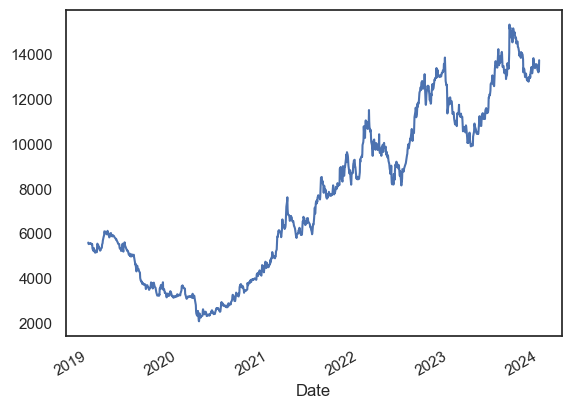

In [104]:
laxmi['price_t'].plot()

### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

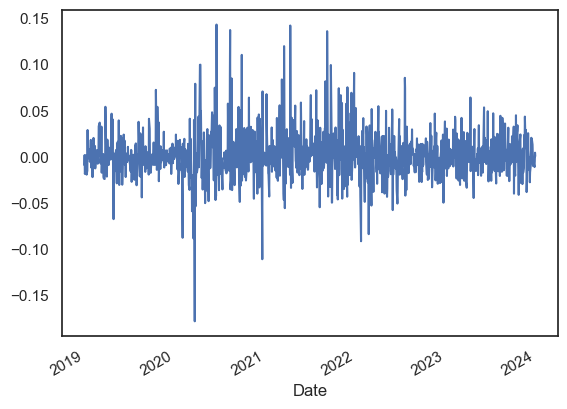

In [105]:
laxmi['daily_returns'].plot() 

## Moving Average (30 day)

In [106]:
laxmi['mov_avg']= laxmi['price_t'].rolling(30).mean() 


<Axes: xlabel='Date'>

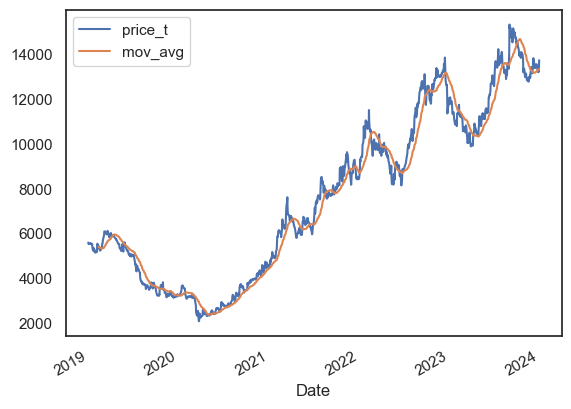

In [107]:
laxmi[[ 'price_t' , 'mov_avg']].plot() 

## Volatility Measures (30 Day)  

<Axes: xlabel='Date'>

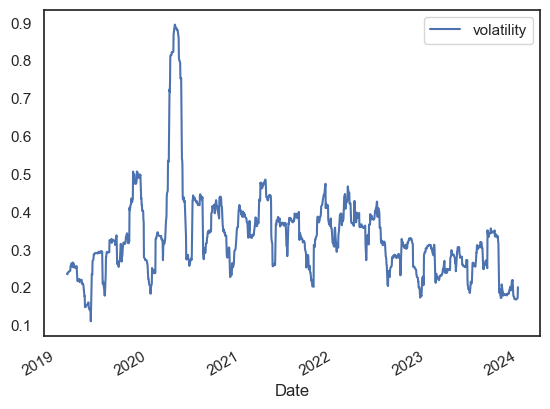

In [108]:
laxmi['Log_Ret'] = np.log(laxmi['price_t'] / laxmi ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

laxmi ['volatility'] = laxmi['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

laxmi [['volatility']] .plot() 

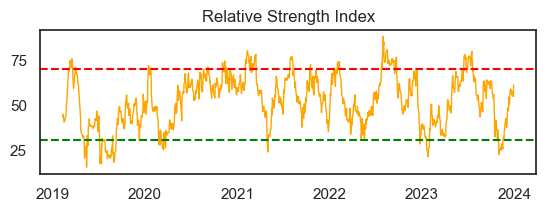

In [109]:
#### RSI (30-day)

change = laxmi["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## Identify periods of high and low volatility.

[*********************100%%**********************]  1 of 1 completed


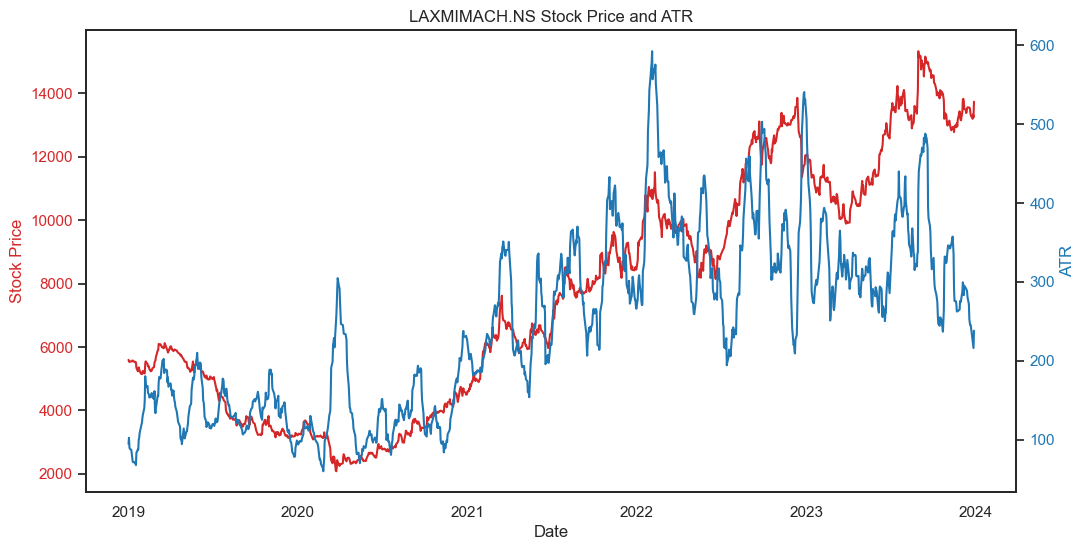

High ATR Periods:
DatetimeIndex(['2021-03-15', '2021-03-17', '2021-03-18', '2021-03-19',
               '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25',
               '2021-03-26', '2021-03-30',
               ...
               '2023-11-01', '2023-11-02', '2023-11-03', '2023-11-06',
               '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10',
               '2023-11-13', '2023-11-15'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)

Low ATR Periods:
DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2020-11-14', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20', '2020-11-23', '2020-11-24', '2020-11-25',
               '2020-11-26', '2020-11-27'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)


In [110]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate Average True Range (ATR)
def calculate_atr(data, window_size):
    high_low_range = data['High'] - data['Low']
    high_close_range = abs(data['High'] - data['Close'].shift())
    low_close_range = abs(data['Low'] - data['Close'].shift())
    true_range = pd.concat([high_low_range, high_close_range, low_close_range], axis=1).max(axis=1)
    atr = true_range.rolling(window=window_size, min_periods=1).mean()
    return atr

# Define the stock ticker or index
ticker = 'LAXMIMACH.NS'  # Example: 

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Set the window size for calculating ATR (adjust as needed)
window_size = 14

# Calculate ATR
atr = calculate_atr(stock_data, window_size)

# Plotting the stock prices and ATR
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(stock_data.index, stock_data['Adj Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('ATR', color=color)
ax2.plot(atr.index, atr, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f'{ticker} Stock Price and ATR')
plt.show()

# Identify periods of high and low ATR
high_atr_periods = atr[atr > atr.quantile(0.75)].index
low_atr_periods = atr[atr < atr.quantile(0.25)].index

print("High ATR Periods:")
print(high_atr_periods)

print("\nLow ATR Periods:")
print(low_atr_periods)

## Examine the impact of earnings announcements on stock prices.

[*********************100%%**********************]  1 of 1 completed


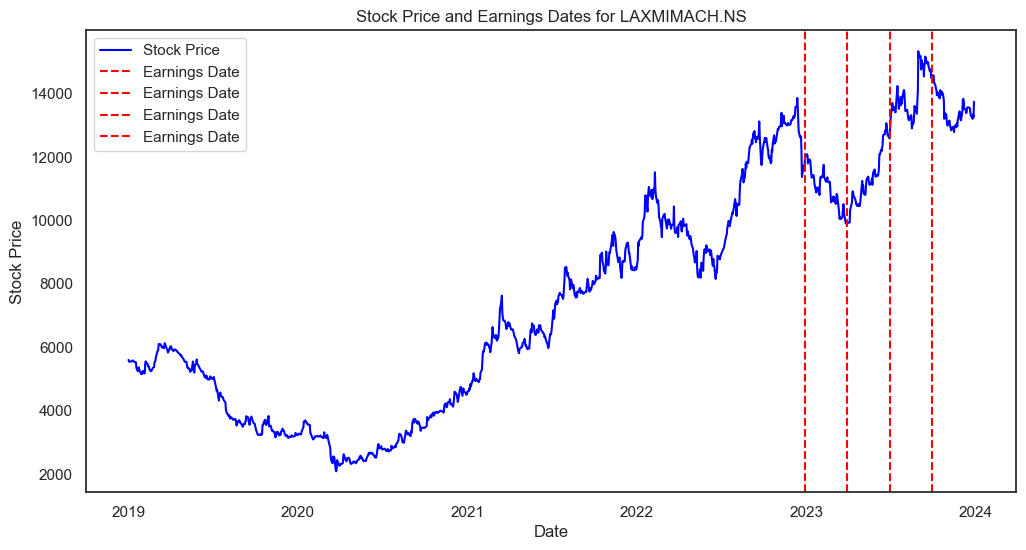

In [111]:

# Function to manually specify earnings dates
def get_manual_earnings_dates():
    # Manually input earnings dates (replace with actual dates)
    earnings_dates = ['2022-12-30', '2023-03-31', '2023-06-30', '2023-09-30']  # Quaterly bases 

    return pd.to_datetime(earnings_dates)

# Function to fetch stock price data and plot earnings impact
def plot_earnings_impact(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Manually specify earnings dates
    earnings_dates = get_manual_earnings_dates()

    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Adj Close'], label='Stock Price', color='blue')

    # Plot vertical lines at earnings dates
    for date in earnings_dates:
        plt.axvline(x=date, color='red', linestyle='--', label='Earnings Date')

    plt.title(f'Stock Price and Earnings Dates for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Set the stock ticker and date range
ticker = 'LAXMIMACH.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Plot stock prices around manually specified earnings dates
plot_earnings_impact(ticker, start_date, end_date)


# PAGEIND

In [112]:
page = yf.download('PAGEIND.NS', start="2019-01-01", end="2023-12-30")
page.head()   

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,25200.000000,25200.000000,24602.550781,24847.199219,23833.337891,33677
2019-01-02,24790.000000,25111.000000,24330.000000,24591.150391,23587.738281,29590
2019-01-03,24500.000000,24700.000000,23529.449219,23614.099609,22650.554688,41968
2019-01-04,23800.000000,24000.000000,22532.599609,22663.000000,21738.263672,72358
2019-01-07,22977.650391,23498.800781,21825.000000,21907.550781,21013.638672,169813


In [113]:
page.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1234 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1234 non-null   float64
 1   High       1234 non-null   float64
 2   Low        1234 non-null   float64
 3   Close      1234 non-null   float64
 4   Adj Close  1234 non-null   float64
 5   Volume     1234 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [114]:
page.describe() 

,Open,High,Low,Close,Adj Close,Volume
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,31802.837115,32228.274625,31343.694231,31762.701300,31256.482230,32507.564019
std,9985.516448,10046.220799,9896.670993,9975.585872,10105.620899,28924.611388
min,16547.449219,16950.000000,16254.000000,16497.800781,16033.808594,1529.000000
25%,22143.149414,22502.500000,21801.287598,22138.675293,21452.716309,16961.750000
50%,30900.299805,31179.724609,30332.525391,30879.800781,30324.602539,24846.500000
75%,40037.537109,40491.161133,39511.963867,40036.462891,39709.215820,38559.500000
max,53800.000000,54349.101562,53075.250000,53795.800781,53344.480469,415963.000000


In [115]:
page.rename(columns={"Adj Close": "price_t"}, inplace=True)
page.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,25200.000000,25200.000000,24602.550781,24847.199219,23833.337891,33677
2019-01-02,24790.000000,25111.000000,24330.000000,24591.150391,23587.738281,29590
2019-01-03,24500.000000,24700.000000,23529.449219,23614.099609,22650.554688,41968
2019-01-04,23800.000000,24000.000000,22532.599609,22663.000000,21738.263672,72358
2019-01-07,22977.650391,23498.800781,21825.000000,21907.550781,21013.638672,169813



### Calculate daily returns.

In [116]:
page['daily_returns']=page["price_t"].pct_change()
page

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,25200.000000,25200.000000,24602.550781,24847.199219,23833.337891,33677,NaN
2019-01-02,24790.000000,25111.000000,24330.000000,24591.150391,23587.738281,29590,-0.010305
2019-01-03,24500.000000,24700.000000,23529.449219,23614.099609,22650.554688,41968,-0.039732
2019-01-04,23800.000000,24000.000000,22532.599609,22663.000000,21738.263672,72358,-0.040277
2019-01-07,22977.650391,23498.800781,21825.000000,21907.550781,21013.638672,169813,-0.033334
...,...,...,...,...,...,...,...
2023-12-22,37480.000000,37777.000000,37181.851562,37612.250000,37612.250000,20574,0.010288
2023-12-26,37870.000000,37870.000000,37400.000000,37564.750000,37564.750000,13279,-0.001263
2023-12-27,37564.750000,37999.898438,37364.800781,37929.449219,37929.449219,25789,0.009709


### Visualize the trend of stock price.

<Axes: xlabel='Date'>

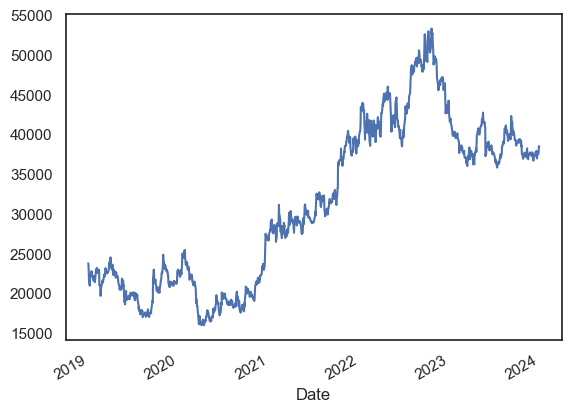

In [117]:
page['price_t'].plot()

## Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

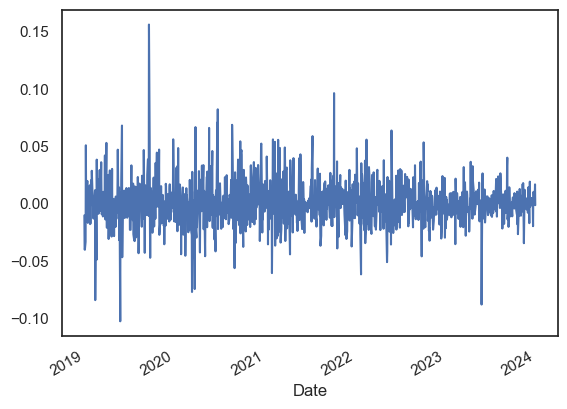

In [118]:
page['daily_returns'].plot() 

## Moving Average (30 day) 

In [119]:
page['mov_avg']= page['price_t'].rolling(30).mean() 


<Axes: xlabel='Date'>

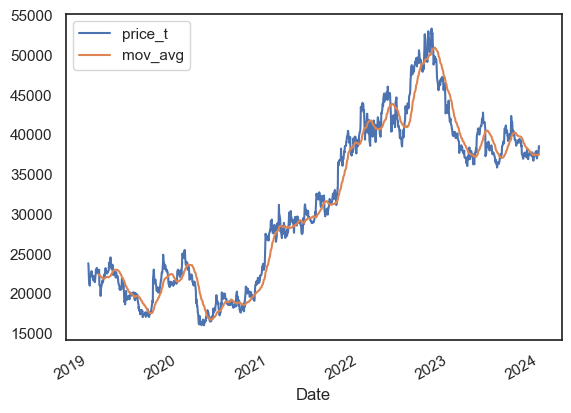

In [120]:
page[[ 'price_t' , 'mov_avg']].plot() 

## Volatility Measures (30 Day)  

<Axes: xlabel='Date'>

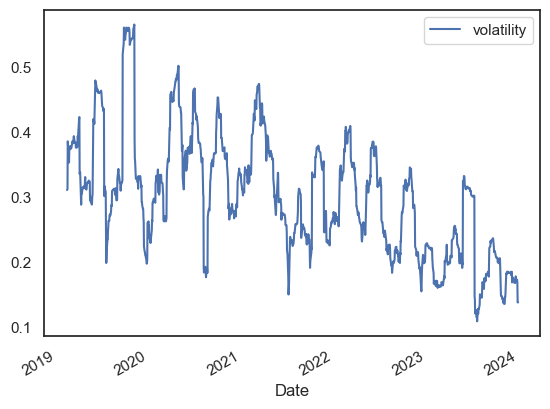

In [121]:

page['Log_Ret'] = np.log(page['price_t'] / page ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

page ['volatility'] = page ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

page [['volatility']] .plot() 


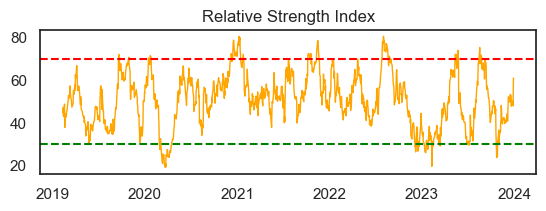

In [122]:
#### RSI (30-day)

change = page["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')   

## Identify periods of high and low volatility.


[*********************100%%**********************]  1 of 1 completed


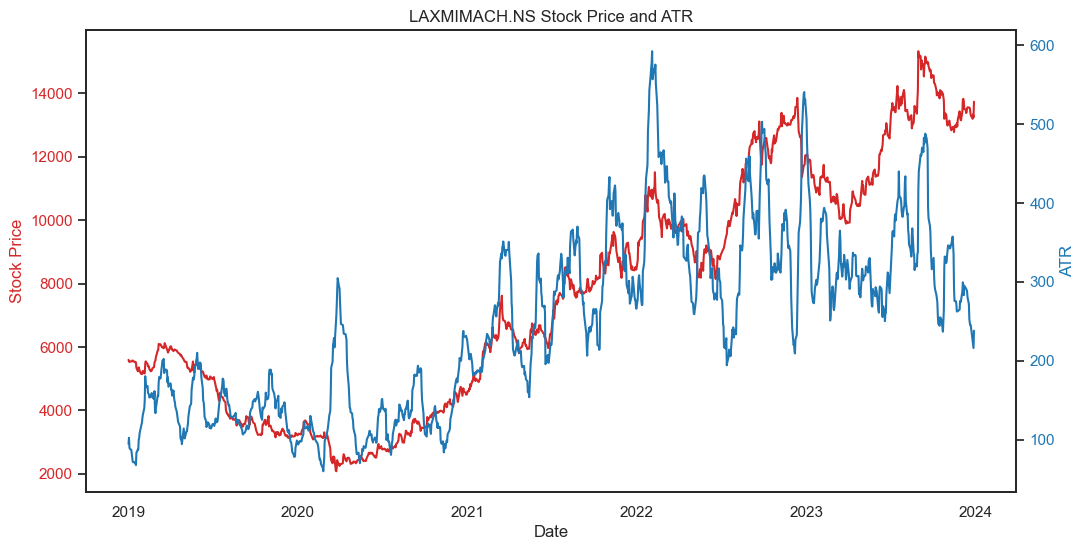

High ATR Periods:
DatetimeIndex(['2021-03-15', '2021-03-17', '2021-03-18', '2021-03-19',
               '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25',
               '2021-03-26', '2021-03-30',
               ...
               '2023-11-01', '2023-11-02', '2023-11-03', '2023-11-06',
               '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10',
               '2023-11-13', '2023-11-15'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)

Low ATR Periods:
DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2020-11-14', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20', '2020-11-23', '2020-11-24', '2020-11-25',
               '2020-11-26', '2020-11-27'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)


In [123]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate Average True Range (ATR)
def calculate_atr(data, window_size):
    high_low_range = data['High'] - data['Low']
    high_close_range = abs(data['High'] - data['Close'].shift())
    low_close_range = abs(data['Low'] - data['Close'].shift())
    true_range = pd.concat([high_low_range, high_close_range, low_close_range], axis=1).max(axis=1)
    atr = true_range.rolling(window=window_size, min_periods=1).mean()
    return atr

# Define the stock ticker or index
ticker = 'LAXMIMACH.NS'  # Example: 

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Set the window size for calculating ATR (adjust as needed)
window_size = 14

# Calculate ATR
atr = calculate_atr(stock_data, window_size)

# Plotting the stock prices and ATR
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(stock_data.index, stock_data['Adj Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('ATR', color=color)
ax2.plot(atr.index, atr, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f'{ticker} Stock Price and ATR')
plt.show()

# Identify periods of high and low ATR
high_atr_periods = atr[atr > atr.quantile(0.75)].index
low_atr_periods = atr[atr < atr.quantile(0.25)].index

print("High ATR Periods:")
print(high_atr_periods)

print("\nLow ATR Periods:")
print(low_atr_periods)

## Examine the impact of earnings announcements on stock prices.

[*********************100%%**********************]  1 of 1 completed


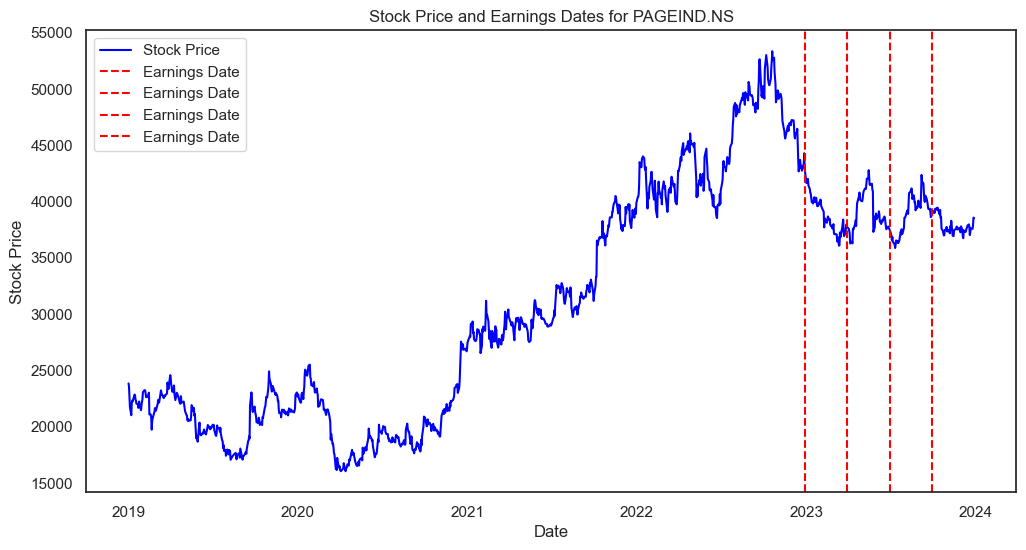

In [124]:

# Function to manually specify earnings dates
def get_manual_earnings_dates():
    # Manually input earnings dates (replace with actual dates)
    earnings_dates = ['2022-12-30', '2023-03-31', '2023-06-30', '2023-09-30']  # Quaterly bases 

    return pd.to_datetime(earnings_dates)

# Function to fetch stock price data and plot earnings impact
def plot_earnings_impact(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Manually specify earnings dates
    earnings_dates = get_manual_earnings_dates()

    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Adj Close'], label='Stock Price', color='blue')

    # Plot vertical lines at earnings dates
    for date in earnings_dates:
        plt.axvline(x=date, color='red', linestyle='--', label='Earnings Date')

    plt.title(f'Stock Price and Earnings Dates for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Set the stock ticker and date range
ticker = 'PAGEIND.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Plot stock prices around manually specified earnings dates
plot_earnings_impact(ticker, start_date, end_date)


# TRIDENT 

In [125]:
tri = yf.download('TRIDENT.NS', start="2019-01-01", end="2023-12-30")
tri.head()   

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,6.620,6.895,6.62,6.820,5.939978,13560030
2019-01-02,6.770,6.840,6.65,6.745,5.874657,4528870
2019-01-03,6.790,6.850,6.71,6.730,5.861593,5166720
2019-01-04,6.765,6.790,6.63,6.675,5.813689,3540830
2019-01-07,6.700,6.800,6.70,6.725,5.857237,3584990


In [126]:
tri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [127]:
tri.rename(columns={"Adj Close": "price_t"}, inplace=True)
tri.head()  

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,6.620,6.895,6.62,6.820,5.939978,13560030
2019-01-02,6.770,6.840,6.65,6.745,5.874657,4528870
2019-01-03,6.790,6.850,6.71,6.730,5.861593,5166720
2019-01-04,6.765,6.790,6.63,6.675,5.813689,3540830
2019-01-07,6.700,6.800,6.70,6.725,5.857237,3584990


In [128]:
tri.describe() 

,Open,High,Low,Close,price_t,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,23.126870,23.504146,22.667648,23.032417,22.497803,1.256095e+07
std,16.735390,16.988893,16.391847,16.654692,16.577562,1.903846e+07
min,3.200000,3.500000,3.050000,3.300000,3.134243,0.000000e+00
25%,6.750000,6.850000,6.630000,6.700000,6.126021,4.167097e+06
50%,17.400000,17.750000,16.900000,17.150000,16.620987,6.439909e+06
75%,36.599998,37.125000,36.074999,36.450001,36.222950,1.233850e+07
max,70.000000,70.349998,67.000000,68.000000,66.613960,2.702442e+08



#### Calculate daily returns.

In [129]:
tri['daily_returns']=tri["price_t"].pct_change()
tri

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,6.620000,6.895000,6.620000,6.820000,5.939978,13560030,NaN
2019-01-02,6.770000,6.840000,6.650000,6.745000,5.874657,4528870,-0.010997
2019-01-03,6.790000,6.850000,6.710000,6.730000,5.861593,5166720,-0.002224
2019-01-04,6.765000,6.790000,6.630000,6.675000,5.813689,3540830,-0.008172
2019-01-07,6.700000,6.800000,6.700000,6.725000,5.857237,3584990,0.007491
...,...,...,...,...,...,...,...
2023-12-22,36.500000,36.650002,35.900002,36.150002,36.150002,7525883,0.002774
2023-12-26,36.400002,36.450001,35.900002,36.049999,36.049999,7552200,-0.002766
2023-12-27,36.400002,36.400002,35.849998,36.099998,36.099998,7051280,0.001387


### Visualize the trend of stock price.

<Axes: xlabel='Date'>

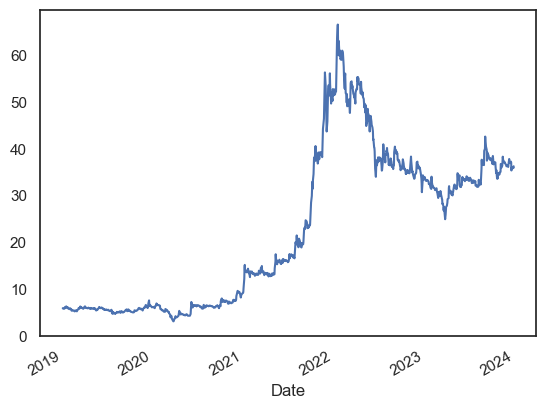

In [130]:
tri['price_t'].plot()

### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

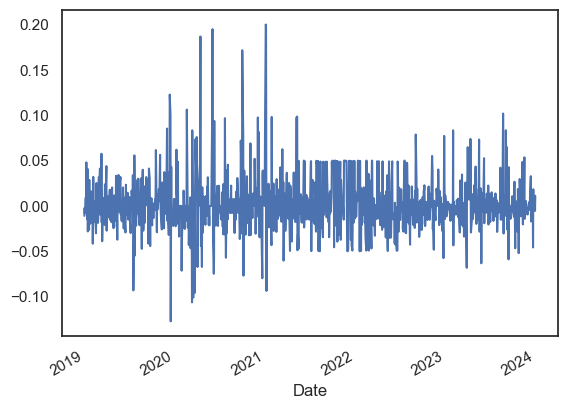

In [131]:
tri['daily_returns'].plot() 

## Moving Average (30 day)

In [132]:
tri['mov_avg']= tri['price_t'].rolling(30).mean() 

<Axes: xlabel='Date'>

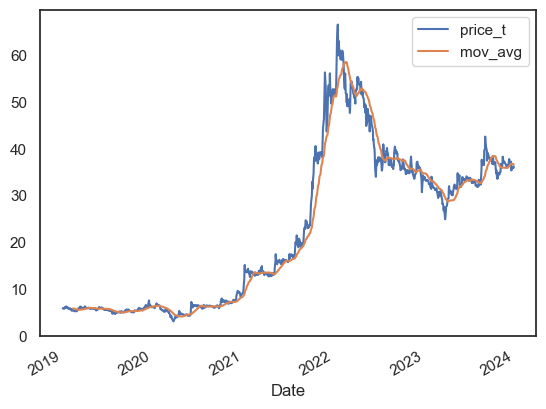

In [133]:
tri[[ 'price_t' , 'mov_avg']].plot() 

## Volatility Measures (30 Day)  

<Axes: xlabel='Date'>

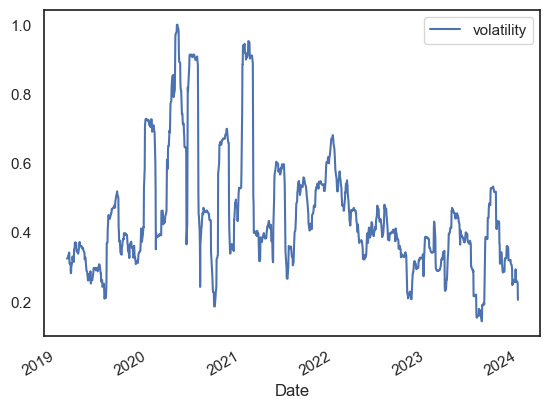

In [134]:
tri['Log_Ret'] = np.log(tri['price_t'] / tri ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

tri ['volatility'] = tri ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

tri [['volatility']] .plot() 


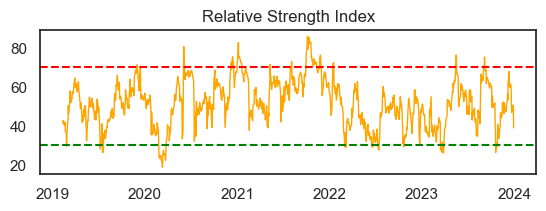

In [135]:
#### RSI (30-day)

change = tri["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## Identify periods of high and low volatility.


[*********************100%%**********************]  1 of 1 completed


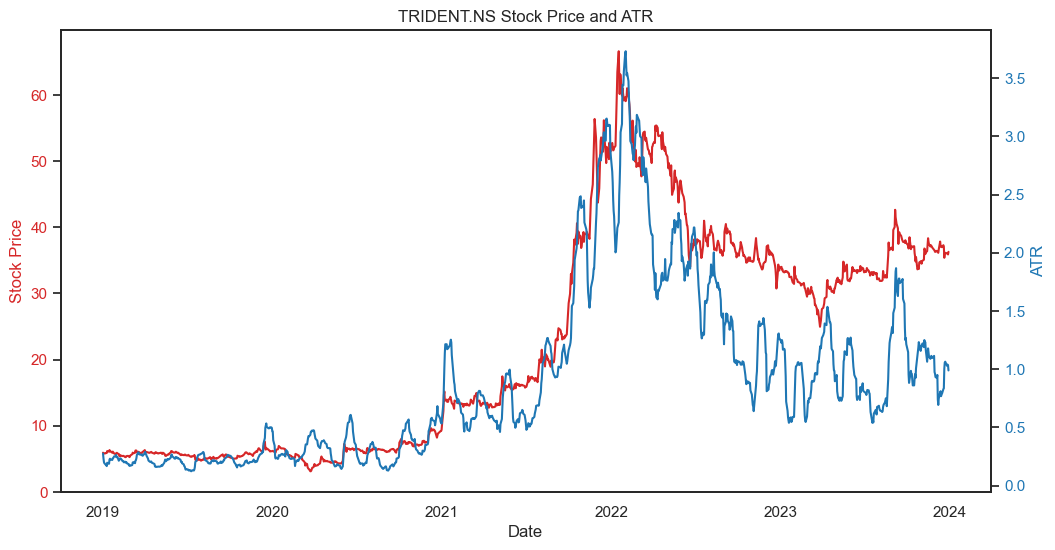

High ATR Periods:
DatetimeIndex(['2021-01-19', '2021-01-20', '2021-01-21', '2021-08-16',
               '2021-08-17', '2021-08-18', '2021-10-05', '2021-10-06',
               '2021-10-07', '2021-10-08',
               ...
               '2023-09-20', '2023-09-21', '2023-09-22', '2023-09-25',
               '2023-09-26', '2023-09-27', '2023-09-28', '2023-10-26',
               '2023-11-07', '2023-11-09'],
              dtype='datetime64[ns]', name='Date', length=308, freq=None)

Low ATR Periods:
DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-09-17', '2020-09-18', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-28',
               '2020-09-29', '2020-09-30'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)


In [136]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate Average True Range (ATR)
def calculate_atr(data, window_size):
    high_low_range = data['High'] - data['Low']
    high_close_range = abs(data['High'] - data['Close'].shift())
    low_close_range = abs(data['Low'] - data['Close'].shift())
    true_range = pd.concat([high_low_range, high_close_range, low_close_range], axis=1).max(axis=1)
    atr = true_range.rolling(window=window_size, min_periods=1).mean()
    return atr

# Define the stock ticker or index
ticker = 'TRIDENT.NS'  # Example: 

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Set the window size for calculating ATR (adjust as needed)
window_size = 14

# Calculate ATR
atr = calculate_atr(stock_data, window_size)

# Plotting the stock prices and ATR
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(stock_data.index, stock_data['Adj Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('ATR', color=color)
ax2.plot(atr.index, atr, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f'{ticker} Stock Price and ATR')
plt.show()

# Identify periods of high and low ATR
high_atr_periods = atr[atr > atr.quantile(0.75)].index
low_atr_periods = atr[atr < atr.quantile(0.25)].index

print("High ATR Periods:")
print(high_atr_periods)

print("\nLow ATR Periods:")
print(low_atr_periods)

## Examine the impact of earnings announcements on stock prices.

[*********************100%%**********************]  1 of 1 completed


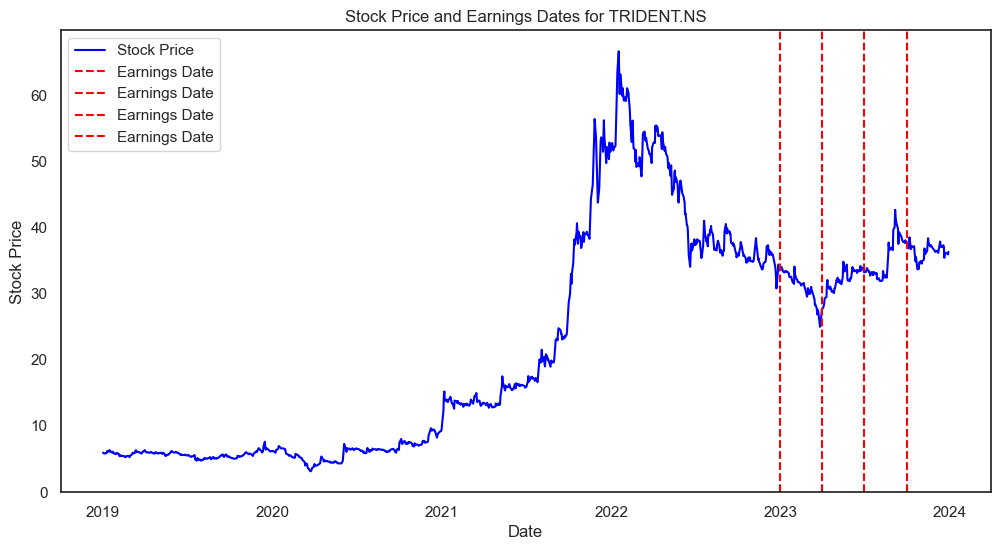

In [137]:
# Function to manually specify earnings dates
def get_manual_earnings_dates():
    # Manually input earnings dates (replace with actual dates)
    earnings_dates = ['2022-12-30', '2023-03-31', '2023-06-30', '2023-09-30']  # Quaterly bases 

    return pd.to_datetime(earnings_dates)

# Function to fetch stock price data and plot earnings impact
def plot_earnings_impact(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Manually specify earnings dates
    earnings_dates = get_manual_earnings_dates()

    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Adj Close'], label='Stock Price', color='blue')

    # Plot vertical lines at earnings dates
    for date in earnings_dates:
        plt.axvline(x=date, color='red', linestyle='--', label='Earnings Date')

    plt.title(f'Stock Price and Earnings Dates for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Set the stock ticker and date range
ticker = 'TRIDENT.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Plot stock prices around manually specified earnings dates
plot_earnings_impact(ticker, start_date, end_date)

# WELSPUNIND

In [138]:
wel = yf.download('WELSPUNIND.NS', start="2019-01-01", end="2023-12-30")
wel.head()  

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,59.799999,60.750000,59.299999,60.500000,57.771790,377138
2019-01-02,60.450001,62.400002,59.750000,61.349998,58.583462,782890
2019-01-03,61.700001,62.250000,60.799999,61.200001,58.440231,398033
2019-01-04,61.200001,61.599998,60.250000,60.849998,58.106007,369574
2019-01-07,61.049999,61.799999,61.000000,61.299999,58.535713,252967


In [139]:
wel.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [140]:
wel.rename(columns={"Adj Close": "price_t"}, inplace=True)
wel.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,59.799999,60.750000,59.299999,60.500000,57.771790,377138
2019-01-02,60.450001,62.400002,59.750000,61.349998,58.583462,782890
2019-01-03,61.700001,62.250000,60.799999,61.200001,58.440231,398033
2019-01-04,61.200001,61.599998,60.250000,60.849998,58.106007,369574
2019-01-07,61.049999,61.799999,61.000000,61.299999,58.535713,252967


In [141]:
wel.describe() 

,Open,High,Low,Close,price_t,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,80.839109,82.456680,79.066235,80.610486,79.915438,2.069584e+06
std,34.776405,35.503487,34.047526,34.692992,35.046511,3.728975e+06
min,19.350000,21.500000,18.450001,19.700001,19.607018,0.000000e+00
25%,55.574999,56.574999,54.125000,55.475000,53.259352,5.657320e+05
50%,72.599998,73.699997,70.699997,72.250000,72.072586,1.088940e+06
75%,97.349998,99.275002,95.674999,96.950001,96.717583,2.148992e+06
max,169.449997,170.699997,163.500000,169.300003,168.800003,5.012432e+07


#### Calculate daily returns.

In [142]:
wel['daily_returns']=wel["price_t"].pct_change()
wel

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,59.799999,60.750000,59.299999,60.500000,57.771790,377138,NaN
2019-01-02,60.450001,62.400002,59.750000,61.349998,58.583462,782890,0.014050
2019-01-03,61.700001,62.250000,60.799999,61.200001,58.440231,398033,-0.002445
2019-01-04,61.200001,61.599998,60.250000,60.849998,58.106007,369574,-0.005719
2019-01-07,61.049999,61.799999,61.000000,61.299999,58.535713,252967,0.007395
...,...,...,...,...,...,...,...
2023-12-22,146.449997,147.800003,142.500000,145.300003,145.300003,3166326,0.004494
2023-12-26,145.300003,146.949997,144.000000,144.250000,144.250000,1068644,-0.007226
2023-12-27,144.000000,146.750000,142.199997,143.449997,143.449997,1411250,-0.005546


#### Visualize the trend of stock price

<Axes: xlabel='Date'>

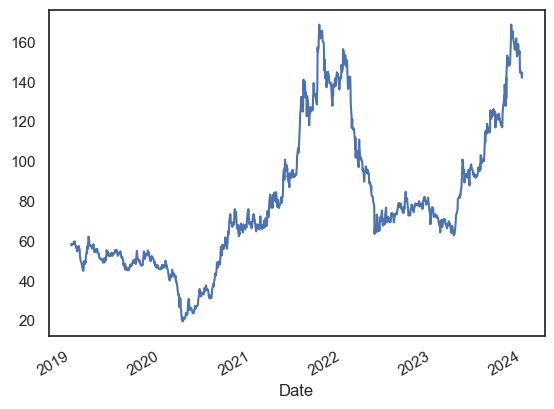

In [143]:
wel['price_t'].plot()

### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

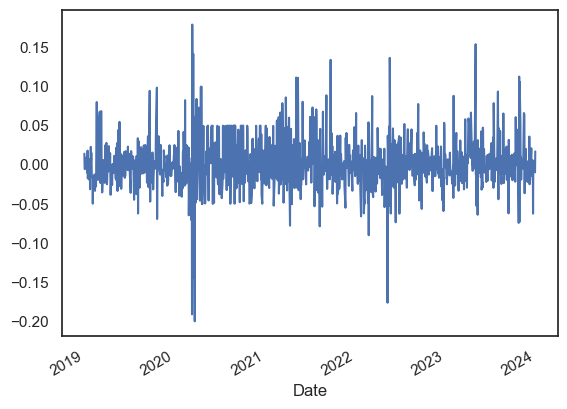

In [144]:
wel['daily_returns'].plot() 

## Moving Average (30 day)

<Axes: xlabel='Date'>

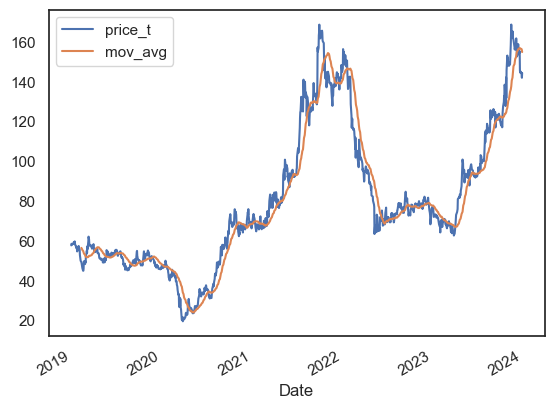

In [145]:
wel['mov_avg']= wel['price_t'].rolling(30).mean() 

wel[[ 'price_t' , 'mov_avg']].plot() 

## Volatility Measures (30 Day)  

<Axes: xlabel='Date'>

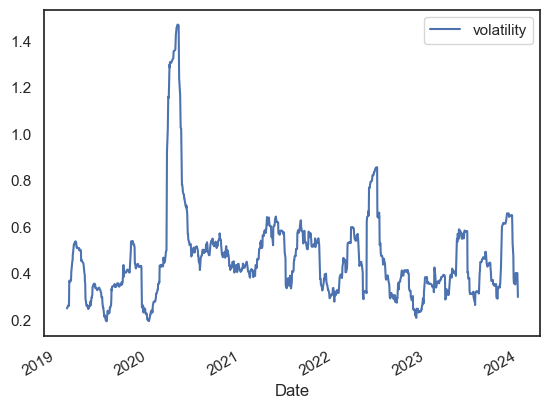

In [146]:
wel['Log_Ret'] = np.log(wel['price_t'] / wel ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

wel ['volatility'] = wel ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

wel [['volatility']] .plot() 

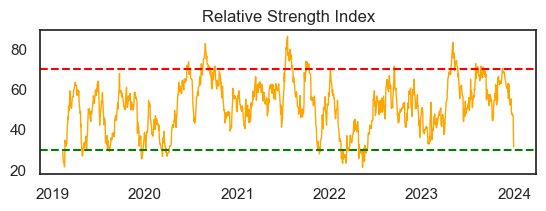

In [147]:
#### RSI (30-day)

change = wel["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## Identify periods of high and low volatility.


[*********************100%%**********************]  1 of 1 completed


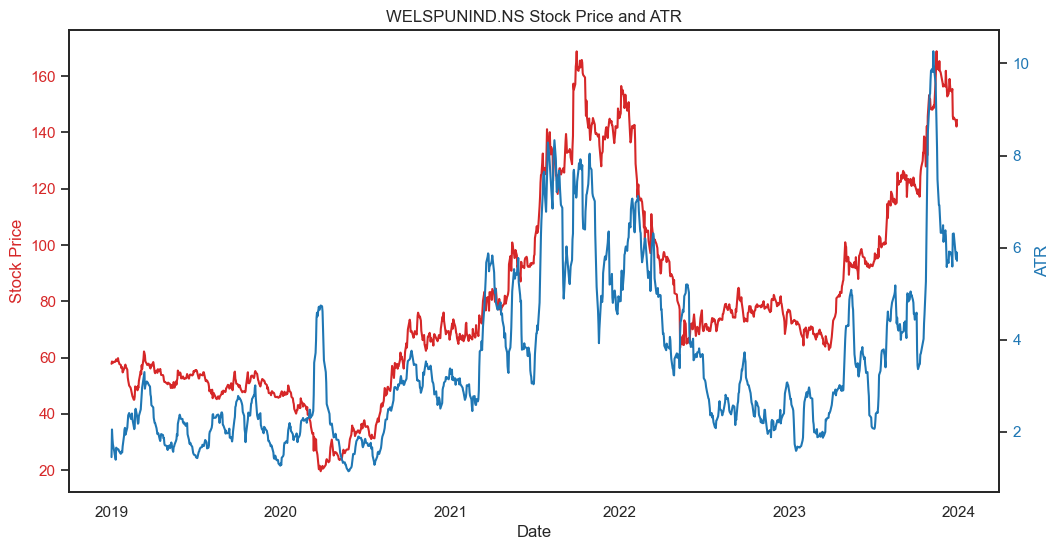

High ATR Periods:
DatetimeIndex(['2020-03-19', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31',
               '2021-03-15', '2021-03-16',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)

Low ATR Periods:
DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2023-03-14', '2023-03-15', '2023-03-16', '2023-03-17',
               '2023-03-20', '2023-06-28', '2023-06-30', '2023-07-03',
               '2023-07-04', '2023-07-05'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)


In [148]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate Average True Range (ATR)
def calculate_atr(data, window_size):
    high_low_range = data['High'] - data['Low']
    high_close_range = abs(data['High'] - data['Close'].shift())
    low_close_range = abs(data['Low'] - data['Close'].shift())
    true_range = pd.concat([high_low_range, high_close_range, low_close_range], axis=1).max(axis=1)
    atr = true_range.rolling(window=window_size, min_periods=1).mean()
    return atr

# Define the stock ticker or index
ticker = 'WELSPUNIND.NS'  # Example: 

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Set the window size for calculating ATR (adjust as needed)
window_size = 14

# Calculate ATR
atr = calculate_atr(stock_data, window_size)

# Plotting the stock prices and ATR
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(stock_data.index, stock_data['Adj Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('ATR', color=color)
ax2.plot(atr.index, atr, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f'{ticker} Stock Price and ATR')
plt.show()

# Identify periods of high and low ATR
high_atr_periods = atr[atr > atr.quantile(0.75)].index
low_atr_periods = atr[atr < atr.quantile(0.25)].index

print("High ATR Periods:")
print(high_atr_periods)

print("\nLow ATR Periods:")
print(low_atr_periods)

## Examine the impact of earnings announcements on stock prices.

[*********************100%%**********************]  1 of 1 completed


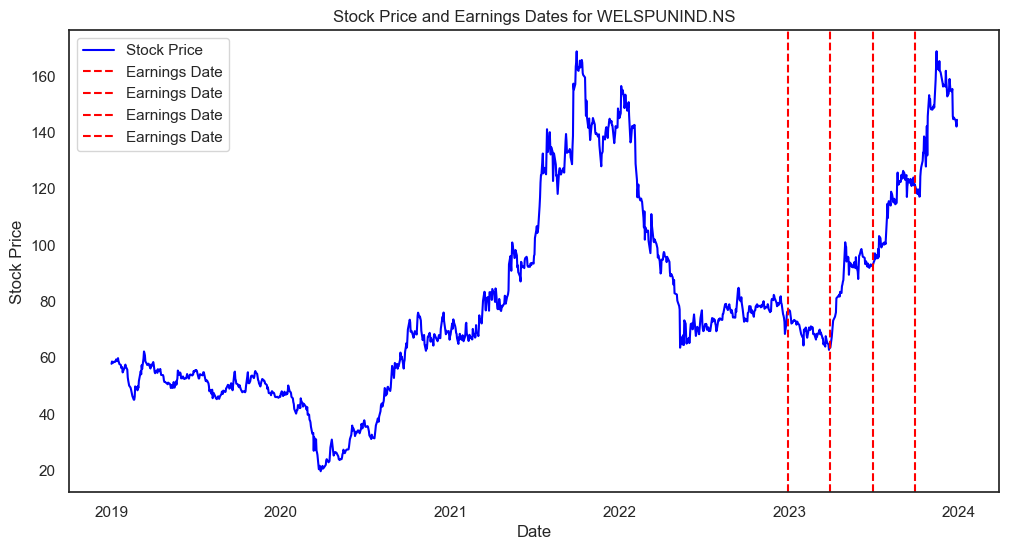

In [149]:
# Function to manually specify earnings dates
def get_manual_earnings_dates():
    # Manually input earnings dates (replace with actual dates)
    earnings_dates = ['2022-12-30', '2023-03-31', '2023-06-30', '2023-09-30']  # Quaterly bases 

    return pd.to_datetime(earnings_dates)

# Function to fetch stock price data and plot earnings impact
def plot_earnings_impact(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Manually specify earnings dates
    earnings_dates = get_manual_earnings_dates()

    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Adj Close'], label='Stock Price', color='blue')

    # Plot vertical lines at earnings dates
    for date in earnings_dates:
        plt.axvline(x=date, color='red', linestyle='--', label='Earnings Date')

    plt.title(f'Stock Price and Earnings Dates for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Set the stock ticker and date range
ticker = 'WELSPUNIND.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Plot stock prices around manually specified earnings dates
plot_earnings_impact(ticker, start_date, end_date) 

## Correlation Matrix Between Stocks and Indices.

In [150]:
tkr = ['KPRMILL.NS','LAXMIMACH.NS','PAGEIND.NS','TRIDENT.NS','WELSPUNIND.NS','^NSEI','^NSEBANK']
textile = yf.download(tkr, start="2019-01-01", end="2023-12-30",group_by='tkr')

[*********************100%%**********************]  7 of 7 completed


In [151]:
close_prices = pd.DataFrame()
for i in tkr:
    close_prices[i] = textile[i]['Adj Close']



## compute the correlation matrix

In [152]:
corr_matrix = close_prices.corr()
corr_matrix

,KPRMILL.NS,LAXMIMACH.NS,PAGEIND.NS,TRIDENT.NS,WELSPUNIND.NS,^NSEI,^NSEBANK
KPRMILL.NS,1.000000,0.935699,0.894321,0.918544,0.747938,0.939957,0.866576
LAXMIMACH.NS,0.935699,1.000000,0.893304,0.819890,0.671581,0.937332,0.921025
PAGEIND.NS,0.894321,0.893304,1.000000,0.904303,0.596768,0.888172,0.827994
TRIDENT.NS,0.918544,0.819890,0.904303,1.000000,0.699970,0.844113,0.731878
WELSPUNIND.NS,0.747938,0.671581,0.596768,0.699970,1.000000,0.799579,0.700119
^NSEI,0.939957,0.937332,0.888172,0.844113,0.799579,1.000000,0.951029
^NSEBANK,0.866576,0.921025,0.827994,0.731878,0.700119,0.951029,1.000000


## create a heatmap of the correlation matrix using Seaborn

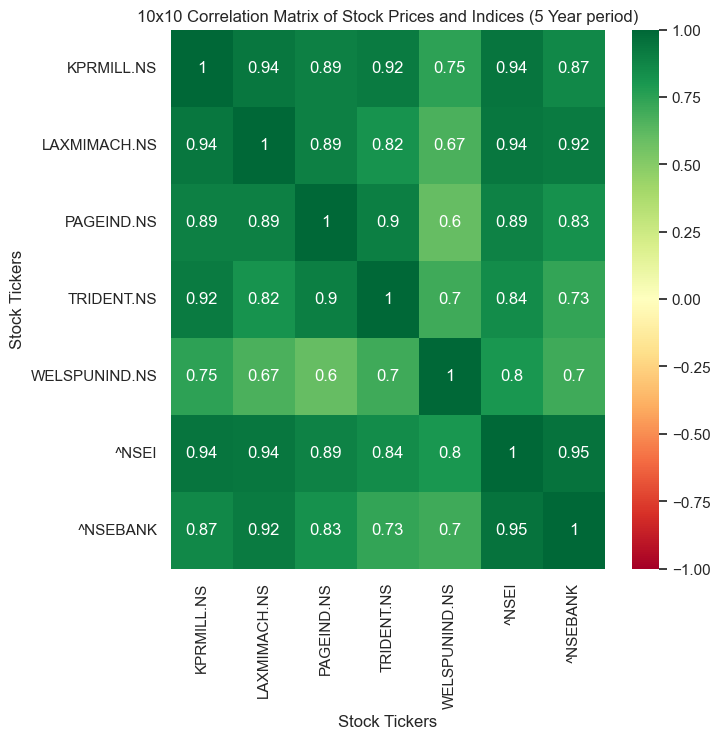

In [153]:
sn.set(style='white')
fig, ax = plt.subplots(figsize=(7, 7))
sn.heatmap(corr_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, ax=ax)# set the axis labels and title
ax.set_xlabel('Stock Tickers')
ax.set_ylabel('Stock Tickers')
ax.set_title('10x10 Correlation Matrix of Stock Prices and Indices (5 Year period)')

# display the plot
plt.show()

## Visualize correlation matrices and identify strong/weak relationships.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


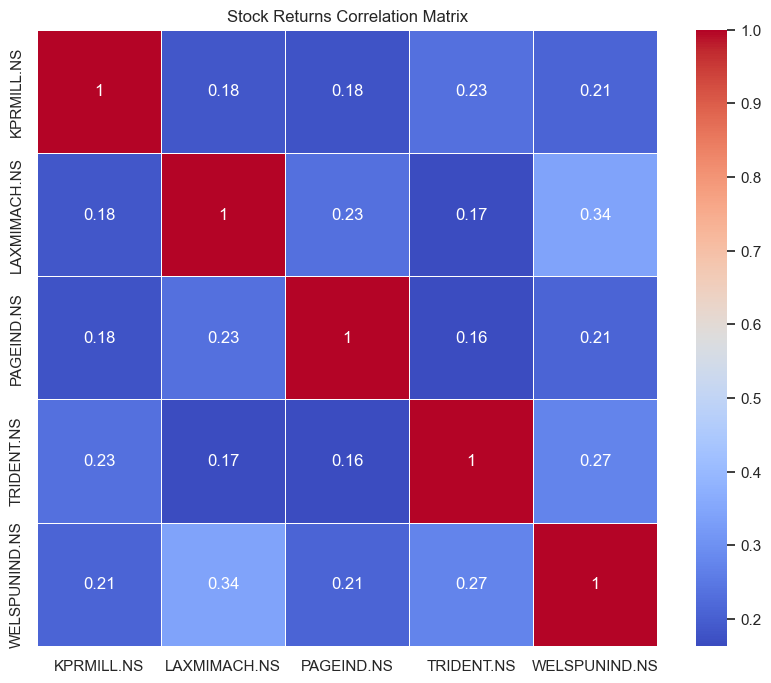

In [154]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Define the list of stock tickers
stock_tickers = ['KPRMILL.NS', 'LAXMIMACH.NS', 'PAGEIND.NS', 'TRIDENT.NS', 'WELSPUNIND.NS']

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch stock data for each ticker
stock_prices = pd.DataFrame({ticker: get_stock_data(ticker, start_date, end_date) for ticker in stock_tickers})

# Calculate the daily returns
returns = stock_prices.pct_change().dropna()

# Calculate the correlation matrix
correlation_matrix = returns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.title('Stock Returns Correlation Matrix')
plt.show()


## Compare and contrast the performance of stocks within each sector.


In [155]:
# Define a list of stock tickers representing each sector
textile_tickers = ['KPRMILL.NS', 'LAXMIMACH.NS', 'PAGEIND.NS','TRIDENT.NS','WELSPUNIND.NS']
trading_tickers = ['ADANIENT.NS', 'MMTC.NS', 'MSTCLTD.NS','REDINGTON.NS','SUNDRMFAST.NS']
#healthcare_tickers = ['JNJ', 'PFE', 'MRK'] 

# Function to fetch historical stock price data
def get_stock_data(tickers):
    data = pd.DataFrame() 
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start='2019-01-01', end='2023-12-30')['Adj Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

# Get historical stock price data for each sector
textile_data = get_stock_data(textile_tickers)
trading_data = get_stock_data(trading_tickers)
# healthcare_data = get_stock_data(healthcare_tickers)

# Check the retrieved data
print("Textile Data:")
print(textile_data.head())

print("Trading Data:")
print(trading_data.head())

#print("Healthcare Data:")
#print(healthcare_data.head())

# Continue with the rest of the analysis...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Textile Data:
            KPRMILL.NS  LAXMIMACH.NS    PAGEIND.NS  TRIDENT.NS  WELSPUNIND.NS
Date                                                                         
2019-01-01  109.892426   5596.933594  23833.337891    5.939978      57.771790
2019-01-02  108.931290   5552.002930  23587.738281    5.874657

In [156]:
# Define a list of stock tickers representing each sector
tickers = ['KPRMILL.NS', 'LAXMIMACH.NS', 'PAGEIND.NS','TRIDENT.NS','WELSPUNIND.NS']

# Function to fetch historical stock price data
def get_stock_data(tickers):
    data = pd.DataFrame() 
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start='2019-01-01', end='2023-12-30')['Adj Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

# Get historical stock price data for each stocks
data = get_stock_data(tickers)

# Check the retrieved data
print("Data:")
print(data.head())

# Continue with the rest of the analysis...

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Data:
            KPRMILL.NS  LAXMIMACH.NS    PAGEIND.NS  TRIDENT.NS  WELSPUNIND.NS
Date                                                                         
2019-01-01  109.892426   5596.933594  23833.337891    5.939978      57.771790
2019-01-02  108.931290   5552.002930  23587.738281    5.874657      58.583462
2019-01-03  109.156876   5529.366699  22650.554688    5.861593      58.440231
2019-01-04  107.156151   5545.687500  21738.263672    5.813689      58.106007
2019-01-07  105.645798   5547.922363  21013.638672    5.857237      58.535713


## Identify sector leaders and laggards.


In [157]:
# Define a list of stock tickers representing each sector
Textile_tickers = ['KPRMILL.NS', 'LAXMIMACH.NS', 'PAGEIND.NS','TRIDENT.NS','WELSPUNIND.NS']
Trading_tickers = ['ADANIENT.NS', 'MMTC.NS', 'MSTCLTD.NS','REDINGTON.NS','SUNDRMFAST.NS']
#healthcare_tickers = ['JNJ', 'PFE', 'MRK']

# Function to fetch historical stock price data
def get_stock_data(tickers):
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start='2019-01-01', end='2023-12-30')['Adj Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

# Get historical stock price data for each sector
Textile_data = get_stock_data(Textile_tickers)
Trading_data = get_stock_data(Trading_tickers)
#healthcare_data = get_stock_data(healthcare_tickers)

# Calculate cumulative returns for each sector
Textile_cumulative_returns = (1 + Textile_data.pct_change()).cumprod()
Trading_cumulative_returns = (1 + Trading_data.pct_change()).cumprod()
#healthcare_cumulative_returns = (1 + healthcare_data.pct_change()).cumprod()

# Calculate overall cumulative returns for each sector
Textile_overall_returns = Textile_cumulative_returns.iloc[-1, :]
Trading_overall_returns = Trading_cumulative_returns.iloc[-1, :]
#healthcare_overall_returns = healthcare_cumulative_returns.iloc[-1, :]

# Identify leaders and laggards
Textile_leader = Textile_overall_returns.idxmax()
Textile_laggard = Textile_overall_returns.idxmin()

Trading_leader = Trading_overall_returns.idxmax()
Trading_laggard = Trading_overall_returns.idxmin()

#healthcare_leader = healthcare_overall_returns.idxmax()
#healthcare_laggard = healthcare_overall_returns.idxmin()

# Print results
print(f"Textile Sector - Leader: {Textile_leader}, Laggard: {Textile_laggard}")
print(f"Trading Sector - Leader: {Trading_leader}, Laggard: {Trading_laggard}")
#print(f"Healthcare Sector - Leader: {healthcare_leader}, Laggard: {healthcare_laggard}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Textile Sector - Leader: KPRMILL.NS, Laggard: PAGEIND.NS
Trading Sector - Leader: ADANIENT.NS, Laggard: MMTC.NS


## Calculate and analyse the volatility of each stock and index.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed


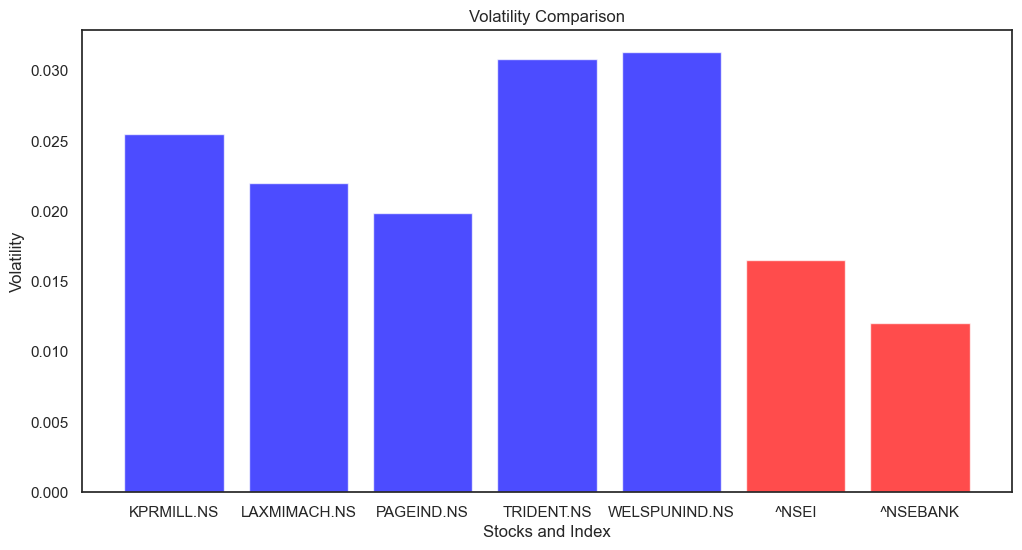

Stock Volatilities:
KPRMILL.NS       0.025507
LAXMIMACH.NS     0.022003
PAGEIND.NS       0.019847
TRIDENT.NS       0.030864
WELSPUNIND.NS    0.031320
dtype: float64

Index Volatility:
^NSEBANK    0.016501
^NSEI       0.012040
dtype: float64


In [158]:

# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate volatility
def calculate_volatility(returns):
    return returns.std()

# Define the stock tickers and index
stock_tickers = ['KPRMILL.NS', 'LAXMIMACH.NS', 'PAGEIND.NS','TRIDENT.NS','WELSPUNIND.NS']
index_ticker = '^NSEI','^NSEBANK'  # S&P 500 as an example

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch stock data for each stock and index
stock_data = pd.DataFrame({ticker: get_stock_data(ticker, start_date, end_date) for ticker in stock_tickers})
index_data = get_stock_data(index_ticker, start_date, end_date)

# Calculate daily returns for each stock and index
stock_returns = stock_data.pct_change().dropna()
index_returns = index_data.pct_change().dropna()

# Calculate volatility for each stock and index
stock_volatility = stock_returns.apply(calculate_volatility)
index_volatility = calculate_volatility(index_returns)

# Plotting the volatility
plt.figure(figsize=(12, 6))

for ticker in stock_tickers:
    plt.bar(ticker, stock_volatility[ticker], color='blue', alpha=0.7)

plt.bar(index_ticker, index_volatility, color='red', alpha=0.7)

plt.title('Volatility Comparison')
plt.xlabel('Stocks and Index')
plt.ylabel('Volatility')
plt.show()

# Display the calculated volatilities
print("Stock Volatilities:")
print(stock_volatility)

print("\nIndex Volatility:")
print(index_volatility)


## Calculate and analyse key financial ratios for each company.


In [159]:


# List of stock tickers for the companies you want to analyze
tickers =  ['KPRMILL.NS', 'LAXMIMACH.NS', 'PAGEIND.NS','TRIDENT.NS','WELSPUNIND.NS']

# Function to fetch financial data from Yahoo Finance
def get_financial_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data['Adj Close'] 

# Function to calculate financial ratios
def calculate_ratios(data):
    ratios = pd.DataFrame()

    # Calculate key financial ratios
    ratios['Return on Equity (ROE)'] = data.pct_change().mean() * 252  # Assuming 252 trading days in a year
    ratios['Return on Assets (ROA)'] = data.pct_change().mean() * 252 / data.mean()
    ratios['Debt to Equity Ratio'] = data.diff().sum() / data.diff(-1).sum()

    return ratios

# Set the start and end dates for financial data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch financial data
financial_data = get_financial_data(tickers, start_date, end_date)

# Calculate ratios
financial_ratios = calculate_ratios(financial_data)

# Display the calculated ratios
print("Financial Ratios:")
print(financial_ratios)


[*********************100%%**********************]  5 of 5 completed
Financial Ratios:
               Return on Equity (ROE)  Return on Assets (ROA)  \
KPRMILL.NS                   0.493061                0.001351   
LAXMIMACH.NS                 0.244183                0.000032   
PAGEIND.NS                   0.147322                0.000005   
TRIDENT.NS                   0.486691                0.021633   
WELSPUNIND.NS                0.310649                0.003887   

               Debt to Equity Ratio  
KPRMILL.NS                     -1.0  
LAXMIMACH.NS                   -1.0  
PAGEIND.NS                     -1.0  
TRIDENT.NS                     -1.0  
WELSPUNIND.NS                  -1.0  


## Compare ratios across companies and sectors.



In [160]:


# List of stock tickers for the companies you want to analyze
tickers =  ['KPRMILL.NS', 'LAXMIMACH.NS', 'PAGEIND.NS','TRIDENT.NS','WELSPUNIND.NS']
sector_tickers = {'Textile':  ['KPRMILL.NS', 'LAXMIMACH.NS', 'PAGEIND.NS', 'TRIDENT.NS', 'WELSPUNIND.NS']}

# Function to fetch financial data from Yahoo Finance
def get_financial_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data['Adj Close']

# Function to calculate financial ratios
def calculate_ratios(data):
    ratios = pd.DataFrame()

    # Calculate key financial ratios
    ratios['Return on Equity (ROE)'] = data.pct_change().mean() * 252  # Assuming 252 trading days in a year
    ratios['Return on Assets (ROA)'] = data.pct_change().mean() * 252 / data.mean()
    ratios['Debt to Equity Ratio'] = data.diff().sum() / data.diff(-1).sum()

    return ratios

# Function to compare ratios across companies and sectors
def compare_ratios(companies, sector_data):
    comparisons = pd.DataFrame()

    for company in companies:
        company_data = get_financial_data([company], start_date, end_date)
        company_ratios = calculate_ratios(company_data)
        comparisons[company] = company_ratios.iloc[:, 0]  # Assuming ROE for comparison

    for sector, sector_companies in sector_data.items():
        sector_data = get_financial_data(sector_companies, start_date, end_date)
        sector_ratios = calculate_ratios(sector_data)
        comparisons[sector] = sector_ratios.mean(axis=1)

    return comparisons

# Set the start and end dates for financial data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Compare ratios across companies and sectors
comparison_data = compare_ratios(tickers, sector_tickers)

# Display the comparison data
print("Comparison of Ratios:")
print(comparison_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
Comparison of Ratios:
               KPRMILL.NS  LAXMIMACH.NS  PAGEIND.NS  TRIDENT.NS  \
KPRMILL.NS            NaN           NaN         NaN         NaN   
LAXMIMACH.NS          NaN           NaN         NaN         NaN   
PAGEIND.NS            NaN           NaN         NaN         NaN   
TRIDENT.NS            NaN           NaN         NaN         NaN   
WELSPUNIND.NS         NaN           NaN         NaN         NaN   

               WELSPUNIND.NS   Textile  
KPRMILL.NS               NaN -0.168529  
LAXMIMACH.NS             NaN -0.251928  
PAGEIND.NS               NaN -0.284225

## Compare ratios across companies and sectors.


In [161]:


# Define a list of stock tickers
stock_tickers = ['KPRMILL.NS', 'LAXMIMACH.NS', 'PAGEIND.NS', 'TRIDENT.NS', 'WELSPUNIND.NS']  # Add more tickers as needed

# Fetch financial data
data = yf.download(stock_tickers, start='2019-01-01', end='2023-12-30')

# Extract relevant financial metrics (e.g., revenue and net income)
revenue = data['Close'] * data['Volume']
net_income = data['Close'] * data['Volume'] * 0.1  # Dummy calculation, replace with actual data

# Calculate ratios (e.g., P/E ratio)
pe_ratio = data['Close'] / net_income

# Display the calculated ratios
print("P/E Ratios:")
print(pe_ratio)

# You can add more calculations and ratios as needed for comparison
stock_tickers = ['ADANIENT.NS', 'MMTC.NS', 'MSTCLTD.NS','REDINGTON.NS','SUNDRMFAST.NS']  # Add more tickers as needed

# Fetch financial data
data = yf.download(stock_tickers, start='2019-01-01', end='2023-12-30')

# Extract relevant financial metrics (e.g., revenue and net income)
revenue = data['Close'] * data['Volume']
net_income = data['Close'] * data['Volume'] * 0.1  # Dummy calculation, replace with actual data

# Calculate ratios (e.g., P/E ratio)
pe_ratio = data['Close'] / net_income

# Display the calculated ratios
print("P/E Ratios:")
print(pe_ratio)
 
# Visualize the data or perform further analysis as necessary
# ...

# Repeat the process for different sectors or companies as needed


[*********************100%%**********************]  5 of 5 completed
P/E Ratios:
            KPRMILL.NS  LAXMIMACH.NS  PAGEIND.NS    TRIDENT.NS  WELSPUNIND.NS
Date                                                                         
2019-01-01    0.000373      0.004602    0.000297  7.374615e-07       0.000027
2019-01-02    0.000315      0.013158    0.000338  2.208056e-06       0.000013
2019-01-03    0.000168      0.006333    0.000238  1.935464e-06       0.000025
2019-01-04    0.000147      0.003932    0.000138  2.824197e-06       0.000027
2019-01-07    0.000134      0.009461    0.000059  2.789408e-06       0.000040
...                ...           ...         ...           ...            ...
2023-12-22    0.000049      0.000508    0.000486  1.328748e-06       0.000003
2023-12-26    0.000098      0.002455    0.000753  1.324117e-06       0.000009
2023-12-27    0.000072      0.005405    0.000388  1.418182e-06       0.000007
2023-12-28    0.000042      0.004182    0.000302  1.895980e-0